Autores:
- Hernán Francisco Díaz Farías
- María Angélica Parra Mendoza
- Loreto Constanza Zavala Gaete

# Tarea 1
### Realice una exploración de datos para ver que datos existen, cuales de ellos entregan información relevante para el problema y cuales no, eliminación (si corresponde) de datos nulos y duplicados, entre otros.

#### Librerías a utilizar

In [418]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
#from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes


#### Cargar el archivo csv

In [419]:
# Cargar el archivo csv
df = (
    pd.read_csv(
        '../data/apartments_for_rent_classified_100K.csv',
        encoding='ISO-8859-1',
        sep=';',
        low_memory=False # Para evitar warnings de dtype
        )
    )

#### Visualización de los datos

In [420]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,...,"$2,20",Monthly,542,507 509 Esplanade,Redondo Beach,CA,338.520,-1.183.759,RentLingo,1.577360e+09
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,...,"$1,25",Monthly,1500,146 Lochview Dr,Newport News,VA,370.867,-764.941,RentLingo,1.577360e+09
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,...,"$1,40",Monthly,1650,3101 Morningside Dr,Raleigh,NC,358.230,-786.438,RentLingo,1.577360e+09
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,...,"$1,60",Monthly,820,209 Aegean Way,Vacaville,CA,383.622,-1.219.712,RentLingo,1.577360e+09
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,351.038,-1.066.110,RentLingo,1.577360e+09


In [421]:
df.dtypes

id                object
category          object
title             object
body              object
amenities         object
bathrooms         object
bedrooms          object
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display     object
price_type        object
square_feet       object
address           object
cityname          object
state             object
latitude         float64
longitude         object
source            object
time             float64
dtype: object

Los campos tipo object representan campos que pueden contener registros nulos o errores de escritura. Se revisará el campo **id** para empezar.

In [422]:
df['id'].isnull().sum()

np.int64(0)

Creamos una función para revisar si el campo **id** es numérico o no.

In [423]:
def check_id(id):
    try:
        int(id)
        return True
    except:
        return False

numericos = df['id'].apply(check_id).sum()
no_numericos = df['id'].shape[0] - numericos
print(f'Numericos: {numericos}, No numéricos: {no_numericos}')


Numericos: 99823, No numéricos: 3


Se observa que hay 3 registros que no son numéricos. Se revisarán estos registros.

In [424]:
df[~df['id'].apply(check_id)]

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
8808,ange of on-site community amenities. Coming so...,Gym,1,1,USD,No,Thumbnail,"Cats,Dogs",1380,"$1,38",...,NaN,Lawrence,NJ,402.659,-746.959,RentDigs.com,1.568782e+09,NaN,NaN,NaN
33780,xpansive rooftop entertainment deck and many p...,"Parking,Patio/Deck",1,1,USD,No,Thumbnail,NaN,2150,"$2,15",...,NaN,Los Angeles,CA,340.432,-1.182.509,RentDigs.com,1.568745e+09,NaN,NaN,NaN
75947,"ellite,Clubhouse,Dishwasher,Garbage Disposal,G...",2,2,USD,No,Thumbnail,"Cats,Dogs",1019,"$1,02",Monthly,...,Henrico,VA,376.249,-774.948,RentDigs.com,1550831790,NaN,NaN,NaN,NaN


Se procederá a eliminar estos registros.

In [425]:
df = df[df['id'].apply(check_id)]

Se convierte el campo **id** a tipo numérico.

In [426]:
# df['id'] = df['id'].astype(int)

In [427]:
# Revisar si hay valores duplicados
df[df.duplicated()]

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
42261,5508806580,housing/rent/apartment,"Las Vegas, prime location Two BR, Apartment. P...",Live in the middle of it all! South is a pet f...,"Gym,Parking,Pool",2,2,USD,No,Yes,...,"$1,34",Monthly,1084,NaN,Las Vegas,NV,361.536,-1.151.965,RentDigs.com,1.568754e+09
42262,5508806428,housing/rent/apartment,Northglenn Value. Pet OK!,"Square footage: 738 square ft, unit number: 06...","Gym,Parking,Pool,Storage",1,1,USD,No,Yes,...,"$1,33",Monthly,738,NaN,Northglenn,CO,398.999,-1.049.442,RentDigs.com,1.568754e+09
42263,5508806391,housing/rent/apartment,Apartment in move in condition in District Hei...,Capital Courts has something for everyone. Loc...,"AC,Parking,Playground,Pool",1.5,3,USD,No,Yes,...,"$1,32",Monthly,943,NaN,District Heights,MD,388.516,-768.871,RentDigs.com,1.568754e+09
42264,5508806299,housing/rent/apartment,"District Heights, prime location Two BR, Apart...",Income Requirement: Must have 2. 5x the rent i...,Parking,1,2,USD,No,Yes,...,"$1,35",Monthly,931,NaN,District Heights,MD,388.516,-768.871,RentDigs.com,1.568754e+09
42265,5508806233,housing/rent/apartment,"Spacious One BR, One BA","Square footage: 680 sq-ft, unit number: 122. P...","Basketball,Gym,Patio/Deck,Playground,Pool",1,1,USD,No,Yes,...,"$1,26",Monthly,680,NaN,Denver,CO,398.999,-1.049.442,RentDigs.com,1.568754e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83577,5197839500,housing/rent/apartment,"Apartment, Studio, 400 sq. ft. - in a great area.",Apartment for rent in Ruckersville. Dogs Dogs ...,NaN,1,0,USD,No,No,...,$725,Monthly,400,NaN,Ruckersville,VA,382.203,-783.844,RentDigs.com,1.550824e+09
83578,5197836604,housing/rent/apartment,offers the lifestyle you deserve in the center...,"Our pet friendly one, 2 and 3 beds apartment h...",NaN,2,2,USD,No,Yes,...,"$1,24",Monthly,1051,NaN,Charlotte,NC,353.201,-807.409,RentDigs.com,1.550824e+09
83579,5197834189,housing/rent/apartment,"Attractive Two BR, Two BA. Pet OK!","Square footage: 1055 square feet, unit number:...","Gym,Parking,Pool",2,2,USD,No,Yes,...,"$1,48",Monthly,1055,NaN,Tempe,AZ,333.924,-1.119.265,RentDigs.com,1.550824e+09
83580,5197828852,housing/rent/apartment,The Best of the Best in the City of Tempe! Sav...,In the heart of vibrant Tempe near Arizona Sta...,"Gym,Parking,Pool",2,3,USD,No,Yes,...,"$1,88",Monthly,1261,NaN,Tempe,AZ,333.924,-1.119.265,RentDigs.com,1.550823e+09


In [428]:
df.duplicated().sum()

np.int64(84)

In [429]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [430]:
df['category'].unique()

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term', 'housing/rent', 'housing/rent/condo',
       'housing/rent/other', 'housing/rent/commercial/retail'],
      dtype=object)

In [431]:
df = df[df['category'] == 'housing/rent/apartment']

In [432]:
df.count()

id               99678
category         99678
title            99678
body             99678
amenities        83613
bathrooms        99613
bedrooms         99551
currency         99675
fee              99675
has_photo        99675
pets_allowed     39149
price            99674
price_display    99674
price_type       99675
square_feet      99675
address           7939
cityname         99373
state            99373
latitude         99650
longitude        99650
source           99675
time             99675
dtype: int64

In [433]:
df.isnull().sum()

id                   0
category             0
title                0
body                 0
amenities        16065
bathrooms           65
bedrooms           127
currency             3
fee                  3
has_photo            3
pets_allowed     60529
price                4
price_display        4
price_type           3
square_feet          3
address          91739
cityname           305
state              305
latitude            28
longitude           28
source               3
time                 3
dtype: int64

In [434]:
df = df.filter(items=['bathrooms','bedrooms', 'pets_allowed', 'price', 'price_type', 'square_feet', 'cityname'], axis=1)

In [435]:
df.count()

bathrooms       99613
bedrooms        99551
pets_allowed    39149
price           99674
price_type      99675
square_feet     99675
cityname        99373
dtype: int64

In [436]:
df.isnull().sum()

bathrooms          65
bedrooms          127
pets_allowed    60529
price               4
price_type          3
square_feet         3
cityname          305
dtype: int64

In [437]:
df = df.dropna(subset=['bathrooms', 'bedrooms','price', 'cityname'])
df.isnull().sum()

bathrooms           0
bedrooms            0
pets_allowed    60216
price               0
price_type          0
square_feet         0
cityname            0
dtype: int64

In [438]:
#df['pets_allowed'] = df['pets_allowed'].fillna(value=None)
#df['pets_allowed'] = df['pets_allowed'].apply(lambda x:None if pd.isnull(x) else x)
df['pets_allowed'].value_counts()

pets_allowed
Cats,Dogs         37011
Cats               1837
Dogs                126
Cats,Dogs,None        1
Name: count, dtype: int64

In [439]:
# Fill nan values with "No"
df['pets_allowed'] = df['pets_allowed'].fillna('No')
df['pets_allowed'] = df['pets_allowed'].replace("Cats,Dogs,None", "Cats,Dogs")
df['pets_allowed'] = df['pets_allowed'].apply(lambda x: 'Si' if x in ['Cats', 'Dogs', 'Cats,Dogs'] else 'No')
df['pets_allowed'].value_counts().sum()

np.int64(99191)

In [440]:
df.isnull().sum()

bathrooms       0
bedrooms        0
pets_allowed    0
price           0
price_type      0
square_feet     0
cityname        0
dtype: int64

In [441]:
df['price_type'].value_counts()

price_type
Monthly    99188
Weekly         3
Name: count, dtype: int64

In [442]:
df = df[df['price_type'] == 'Monthly']
df['price_type'].value_counts()

price_type
Monthly    99188
Name: count, dtype: int64

In [443]:
df = df.drop(['price_type'], axis=1)

In [444]:
df['bathrooms'].unique()

array(['1', '1.5', '2', '2.5', '3', '3.5', '4', '7', '4.5', '5', '8',
       '8.5', '6', '5.5', '9', '7.5'], dtype=object)

In [445]:
df['bedrooms'].unique()

array(['1', '3', '2', '4', '0', '5', '7', '8', '6', '9'], dtype=object)

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99188 entries, 0 to 99825
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bathrooms     99188 non-null  object 
 1   bedrooms      99188 non-null  object 
 2   pets_allowed  99188 non-null  object 
 3   price         99188 non-null  float64
 4   square_feet   99188 non-null  object 
 5   cityname      99188 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [447]:
df['bathrooms'] = df['bathrooms'].astype(float)
df['bedrooms'] = df['bedrooms'].astype(float)
df['square_feet'] = df['square_feet'].astype(float)

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99188 entries, 0 to 99825
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bathrooms     99188 non-null  float64
 1   bedrooms      99188 non-null  float64
 2   pets_allowed  99188 non-null  object 
 3   price         99188 non-null  float64
 4   square_feet   99188 non-null  float64
 5   cityname      99188 non-null  object 
dtypes: float64(4), object(2)
memory usage: 5.3+ MB


In [449]:
df['bathrooms'].unique()

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 7. , 4.5, 5. , 8. , 8.5, 6. ,
       5.5, 9. , 7.5])

In [450]:
df['bedrooms'].unique()

array([1., 3., 2., 4., 0., 5., 7., 8., 6., 9.])

In [451]:
df.head()

,bathrooms,bedrooms,pets_allowed,price,square_feet,cityname
0,1.0,1.0,Si,2195.0,542.0,Redondo Beach
1,1.5,3.0,Si,1250.0,1500.0,Newport News
2,2.0,3.0,No,1395.0,1650.0,Raleigh
3,1.0,2.0,Si,1600.0,820.0,Vacaville
4,1.0,1.0,Si,975.0,624.0,Albuquerque


In [452]:
df_cuanti = df.drop(['cityname', 'pets_allowed'],axis=1)
df_categ = df[['pets_allowed', 'cityname']]

In [453]:
df_cuanti.corr()

,bathrooms,bedrooms,price,square_feet
bathrooms,1.000000,0.679971,0.330594,0.716414
bedrooms,0.679971,1.000000,0.237600,0.701188
price,0.330594,0.237600,1.000000,0.413263
square_feet,0.716414,0.701188,0.413263,1.000000


In [454]:
stand_fn = preprocessing.StandardScaler() #Tambien se puede usar el minmaxscaler
scaled_df = pd.DataFrame(stand_fn.fit_transform(df_cuanti), columns = df_cuanti.columns)
scaled_df

,bathrooms,bedrooms,price,square_feet
0,-0.815010,-0.973238,0.745063,-1.133772
1,0.099057,1.699008,-0.306837,1.489969
2,1.013125,1.699008,-0.145435,1.900785
3,-0.815010,0.362885,0.082755,-0.372394
4,-0.815010,-0.973238,-0.612946,-0.909193
...,...,...,...,...
99183,-0.815010,-0.973238,-0.830005,-0.961230
99184,1.013125,0.362885,-0.793272,-0.095778
99185,-0.815010,-0.973238,-0.223353,-0.837985
99186,-0.815010,-0.973238,-0.661923,-0.698308


In [455]:
df_categ['pets_allowed'].value_counts()

pets_allowed
No    60214
Si    38974
Name: count, dtype: int64

In [456]:
# df_ajustado = pd.concat([scaled_df,df_categ], axis=1)
df_ajustado = scaled_df.join(df_categ, on = df_cuanti.index)
df_ajustado.shape[0]

99188

In [457]:
df_ajustado.isnull().sum()

key_0           0
bathrooms       0
bedrooms        0
price           0
square_feet     0
pets_allowed    0
cityname        0
dtype: int64

In [458]:
df_ajustado[df_ajustado.isnull().any(axis=1)]

,key_0,bathrooms,bedrooms,price,square_feet,pets_allowed,cityname


In [459]:
filas_con_nulos = df_ajustado[df_ajustado.isnull().any(axis=1)]
filas_con_nulos

,key_0,bathrooms,bedrooms,price,square_feet,pets_allowed,cityname


In [460]:
df_ajustado_2 = scaled_df.join(df_categ)
df_ajustado_2.head()

,bathrooms,bedrooms,price,square_feet,pets_allowed,cityname
0,-0.815010,-0.973238,0.745063,-1.133772,Si,Redondo Beach
1,0.099057,1.699008,-0.306837,1.489969,Si,Newport News
2,1.013125,1.699008,-0.145435,1.900785,No,Raleigh
3,-0.815010,0.362885,0.082755,-0.372394,Si,Vacaville
4,-0.815010,-0.973238,-0.612946,-0.909193,Si,Albuquerque


In [461]:
df_ajustado_2.isnull().sum()

bathrooms         0
bedrooms          0
price             0
square_feet       0
pets_allowed    637
cityname        637
dtype: int64

In [462]:
filas_con_nulos_2 = df_ajustado_2[df_ajustado_2.isnull().any(axis=1)]
filas_con_nulos_2

,bathrooms,bedrooms,price,square_feet,pets_allowed,cityname
790,2.841261,1.699008,8.876416,3.763148,NaN,NaN
930,-0.815010,-0.973238,-0.813308,-0.701046,NaN,NaN
1109,1.013125,0.362885,1.808094,0.942215,NaN,NaN
1364,-0.815010,-0.973238,-0.279009,-0.216284,NaN,NaN
1613,-0.815010,-0.973238,-0.306837,-0.323096,NaN,NaN
...,...,...,...,...,...,...
93681,1.013125,0.362885,-0.368059,0.514967,NaN,NaN
97166,1.013125,0.362885,-0.562855,-0.125905,NaN,NaN
97185,1.013125,1.699008,0.861940,0.668338,NaN,NaN
98277,-0.815010,-0.973238,-1.121642,-0.805120,NaN,NaN


In [463]:
#Es sólo para seguir avanzando
df_ajustado = df_ajustado.dropna()
df_ajustado.isnull().sum()

key_0           0
bathrooms       0
bedrooms        0
price           0
square_feet     0
pets_allowed    0
cityname        0
dtype: int64

In [464]:
# Apply OneHotEncoder and convert the result to a DataFrame
encoder = preprocessing.OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(df_ajustado[['pets_allowed']]).toarray()

# Create a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['pets_allowed']))

encoded_df = encoded_df.join(df_ajustado.drop(['pets_allowed'], axis=1))
encoded_df.head()

,pets_allowed_Si,key_0,bathrooms,bedrooms,price,square_feet,cityname
0,1.0,0,-0.815010,-0.973238,0.745063,-1.133772,Redondo Beach
1,1.0,1,0.099057,1.699008,-0.306837,1.489969,Newport News
2,0.0,2,1.013125,1.699008,-0.145435,1.900785,Raleigh
3,1.0,3,-0.815010,0.362885,0.082755,-0.372394,Vacaville
4,1.0,4,-0.815010,-0.973238,-0.612946,-0.909193,Albuquerque


In [465]:
encoded_df.drop(['cityname','key_0'], axis=1, inplace=True)

In [466]:
distortions = []
K = range(1,4)
for k in K:
    KPrototypesModel = KPrototypes(n_clusters=k, n_jobs=-1)
    KPrototypesModel.fit(encoded_df, categorical = [0])
    distortions.append(KPrototypesModel.cost_)

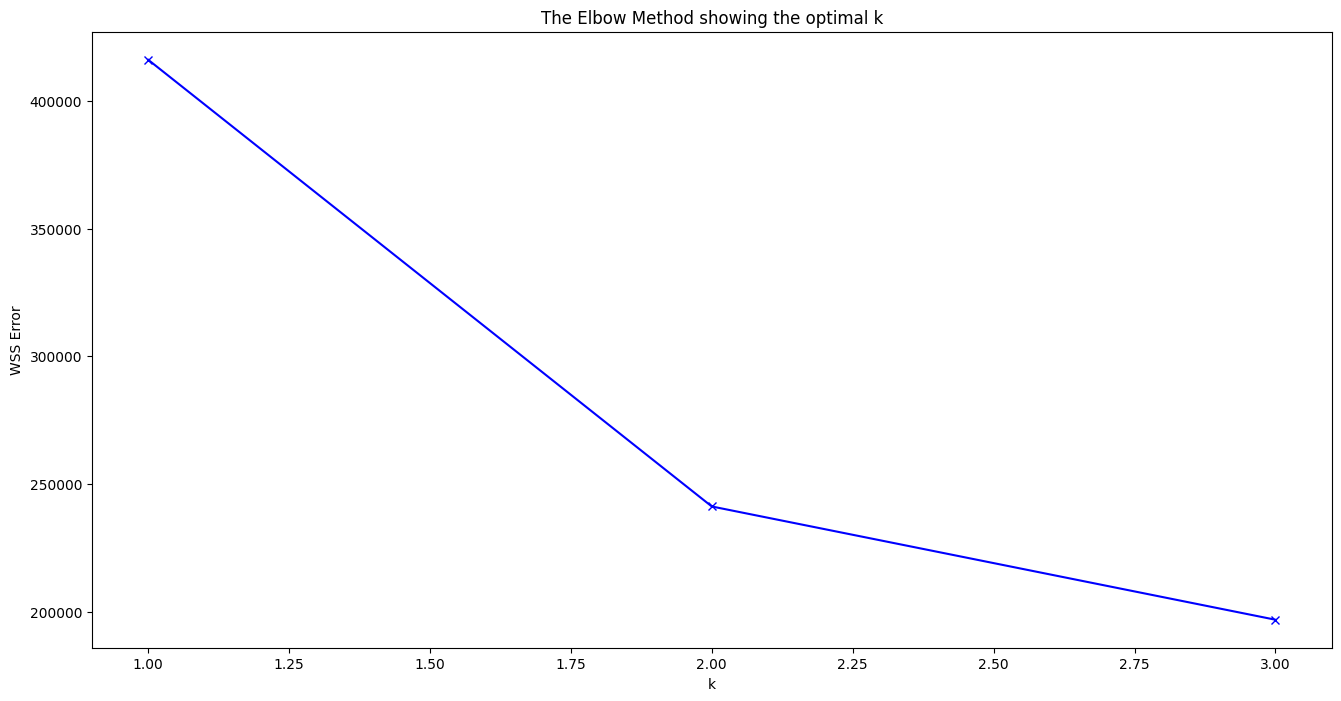

In [467]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS Error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [468]:
kprototype_model = KPrototypes(n_clusters = 2, random_state=2023, n_jobs=-1)
kprototype_model.fit(encoded_df, categorical = [0])

KPrototypes(gamma=np.float64(0.5), n_clusters=2, n_jobs=-1, random_state=2023)

In [469]:
cluster_labels = kprototype_model.predict(encoded_df, categorical = [0])
cluster_labels

array([0, 1, 1, ..., 0, 0, 1], dtype=uint16)

In [474]:
encoded_df['cluster'] = cluster_labels
encoded_df.head()

,pets_allowed_Si,bathrooms,bedrooms,price,square_feet,cluster
0,1.0,-0.815010,-0.973238,0.745063,-1.133772,0
1,1.0,0.099057,1.699008,-0.306837,1.489969,1
2,0.0,1.013125,1.699008,-0.145435,1.900785,1
3,1.0,-0.815010,0.362885,0.082755,-0.372394,0
4,1.0,-0.815010,-0.973238,-0.612946,-0.909193,0


In [472]:
pd.DataFrame(kprototype_model.cluster_centroids_,columns = encoded_df.columns)

,pets_allowed_Si,bathrooms,bedrooms,price,square_feet
0,-0.790264,-0.609123,-0.231152,-0.560815,0.0
1,1.023021,0.788529,0.299233,0.725992,0.0


In [485]:
df_cuanti['cluster'] = cluster_labels
centers_kmeans = df_cuanti.groupby(['cluster']).aggregate('mean').reset_index()
centers_kmeans

,cluster,bathrooms,bedrooms,price,square_feet
0,0,1.013536,1.272516,1317.994192,751.202502
1,1,2.005413,2.318567,1794.478047,1221.050893
